In [114]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3607,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,No
3992,2987-BJXIK,Female,0,No,No,70,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,84.70,5991.05,No
4603,3594-KADLU,Male,0,Yes,No,3,No,No phone service,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,35.10,101.1,No
4865,1355-KUSBG,Female,0,Yes,Yes,7,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,48.80,349.8,No
5760,4583-PARNH,Male,1,Yes,No,16,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,91.55,1540.05,No


In [117]:
df.drop('customerID',axis=1,inplace=True)

In [118]:
# df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [119]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [120]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [121]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [122]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [123]:
#Will displays rows for which total charges is null
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [124]:
df.shape

(7043, 20)

In [125]:
df.iloc[488]['TotalCharges']

' '

In [126]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [127]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [128]:
df1.TotalCharges.dtypes

dtype('float64')

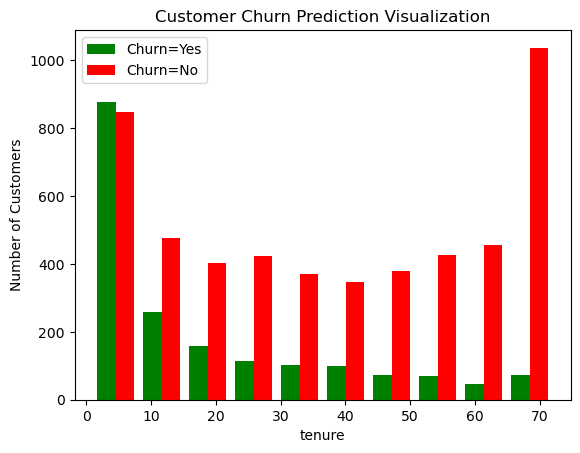

In [129]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

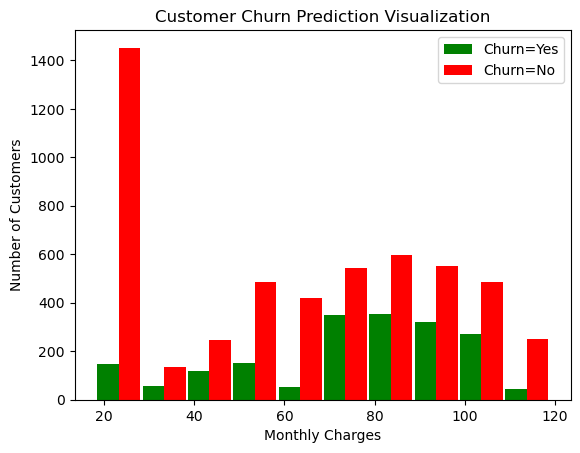

In [130]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men =[113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women = [67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes,mc_churn_no], rwidth=0.95 , color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [131]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [132]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [133]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [134]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [135]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [136]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [137]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [138]:
df1['gender'].unique()

array([1, 0])

In [139]:
#One Hot Encoding
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [140]:
#All data types are now numbers
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [141]:
#Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [142]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2006,0,0,0,0,0.056338,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False
770,0,0,0,0,0.140845,1,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False
1806,0,0,1,1,0.492958,1,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False


In [143]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [144]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [145]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [146]:
X_train.shape

(5625, 26)

In [147]:
X_test.shape

(1407, 26)

In [148]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [149]:
len(X_train.columns)

26

In [150]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [151]:
from tensorflow_addons import losses

In [152]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [153]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds= model.predict(X_test)
    y_preds= np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test,y_preds))
    
    return y_preds

In [154]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 0s 387us/step - loss: 0.5687 - accuracy: 0.6795
Epoch 2/100
176/176 [==============================] - 0s 374us/step - loss: 0.4334 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 375us/step - loss: 0.4181 - accuracy: 0.8036
Epoch 4/100
176/176 [==============================] - 0s 382us/step - loss: 0.4120 - accuracy: 0.8071
Epoch 5/100
176/176 [==============================] - 0s 402us/step - loss: 0.4092 - accuracy: 0.8091
Epoch 6/100
176/176 [==============================] - 0s 388us/step - loss: 0.4066 - accuracy: 0.8124
Epoch 7/100
176/176 [==============================] - 0s 374us/step - loss: 0.4047 - accuracy: 0.8149
Epoch 8/100
176/176 [==============================] - 0s 382us/step - loss: 0.4019 - accuracy: 0.8162
Epoch 9/100
176/176 [==============================] - 0s 369us/step - loss: 0.4013 - accuracy: 0.8171
Epoch 10/100
176/176 [==============================] - 0s 373us/step - l

In [155]:
# import tensorflow as tf
# from tensorflow import keras

# model= keras.Sequential([
#     keras.layers.Dense(26,input_shape=(26,),activation='relu'),
#     keras.layers.Dense(1,activation='sigmoid')
# ])

# model.compile(optimizer = 'adam',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# model.fit(X_train,y_train,epochs=100)

## Handling imbalanced dataset

### Method 1: Undersampling

In [156]:
#Class Count
count_class_0,count_class_1=df1.Churn.value_counts()

#Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [157]:
df_class_0.shape

(5163, 27)

In [158]:
df_class_1.shape

(1869, 27)

In [159]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1074,0,0,0,0,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
5822,1,1,0,0,0.478873,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [160]:
count_class_0,count_class_1

(5163, 1869)

In [161]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
print("Random under sampling")
print(df_test_under.Churn.value_counts())

Random under sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [162]:
#Creating x & y from new dataframe
x = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

#Train Test Split
from sklearn.model_selection import train_test_split
#Stratify:Make sure you have balanced samples
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [163]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [164]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [165]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 461us/step - loss: 0.6099 - accuracy: 0.6953
Epoch 2/100
94/94 [==============================] - 0s 383us/step - loss: 0.5095 - accuracy: 0.7682
Epoch 3/100
94/94 [==============================] - 0s 386us/step - loss: 0.4927 - accuracy: 0.7672
Epoch 4/100
94/94 [==============================] - 0s 391us/step - loss: 0.4876 - accuracy: 0.7676
Epoch 5/100
94/94 [==============================] - 0s 386us/step - loss: 0.4829 - accuracy: 0.7682
Epoch 6/100
94/94 [==============================] - 0s 383us/step - loss: 0.4798 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 389us/step - loss: 0.4768 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 387us/step - loss: 0.4752 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 388us/step - loss: 0.4751 - accuracy: 0.7759
Epoch 10/100
94/94 [==============================] - 0s 392us/step - loss: 0.4723 - accura

## Method 2: Oversampling

In [166]:
count_class_0,count_class_1

(5163, 1869)

In [167]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
print("Random-over sampling")
print(df_test_over.Churn.value_counts())

Random-over sampling
Churn
0    5163
1    5163
Name: count, dtype: int64


In [168]:
x = df_test_over.drop("Churn",axis='columns')
y = df_test_over["Churn"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=15, stratify=y)

In [169]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [170]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [171]:

y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 383us/step - loss: 0.5626 - accuracy: 0.7201
Epoch 2/100
259/259 [==============================] - 0s 363us/step - loss: 0.4924 - accuracy: 0.7613
Epoch 3/100
259/259 [==============================] - 0s 370us/step - loss: 0.4848 - accuracy: 0.7637
Epoch 4/100
259/259 [==============================] - 0s 361us/step - loss: 0.4802 - accuracy: 0.7673
Epoch 5/100
259/259 [==============================] - 0s 360us/step - loss: 0.4768 - accuracy: 0.7662
Epoch 6/100
259/259 [==============================] - 0s 365us/step - loss: 0.4745 - accuracy: 0.7689
Epoch 7/100
259/259 [==============================] - 0s 366us/step - loss: 0.4716 - accuracy: 0.7694
Epoch 8/100
259/259 [==============================] - 0s 377us/step - loss: 0.4700 - accuracy: 0.7737
Epoch 9/100
259/259 [==============================] - 0s 375us/step - loss: 0.4680 - accuracy: 0.7751
Epoch 10/100
259/259 [==============================] - 0s 371us/step - l

## Method 3: SMOTE

In [172]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [173]:
y.value_counts() #we can observe that class is imbalanced

Churn
0    5163
1    1869
Name: count, dtype: int64

In [174]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [176]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [177]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [178]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [179]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 397us/step - loss: 0.5597 - accuracy: 0.7137
Epoch 2/100
259/259 [==============================] - 0s 366us/step - loss: 0.4720 - accuracy: 0.7748
Epoch 3/100
259/259 [==============================] - 0s 376us/step - loss: 0.4600 - accuracy: 0.7820
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7869
Epoch 5/100
259/259 [==============================] - 0s 364us/step - loss: 0.4482 - accuracy: 0.7897
Epoch 6/100
259/259 [==============================] - 0s 379us/step - loss: 0.4445 - accuracy: 0.7941
Epoch 7/100
259/259 [==============================] - 0s 365us/step - loss: 0.4405 - accuracy: 0.7942
Epoch 8/100
259/259 [==============================] - 0s 378us/step - loss: 0.4379 - accuracy: 0.7967
Epoch 9/100
259/259 [==============================] - 0s 378us/step - loss: 0.4342 - accuracy: 0.7996
Epoch 10/100
259/259 [==============================] - 0s 377us/step - los

## Method 4: Use of ensemble with undersampling

In [180]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [181]:
x = df2.drop("Churn",axis='columns')
y = df2['Churn']

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [183]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [184]:
4130/3

1376.6666666666667

In [185]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [186]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [187]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [188]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat((df_majority[start:end],df_minority),axis=0)
    
    X_train = df_train.drop("Churn",axis='columns')
    y_train = df_train.Churn
    
    return X_train,y_train

In [189]:
X_train,y_train= get_train_batch(df3_class0,df3_class1,0,1495)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

y_pred1 = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 448us/step - loss: 0.6181 - accuracy: 0.6739
Epoch 2/100
94/94 [==============================] - 0s 390us/step - loss: 0.5115 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 401us/step - loss: 0.4988 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 390us/step - loss: 0.4909 - accuracy: 0.7625
Epoch 5/100
94/94 [==============================] - 0s 389us/step - loss: 0.4864 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 383us/step - loss: 0.4839 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 384us/step - loss: 0.4811 - accuracy: 0.7702
Epoch 8/100
94/94 [==============================] - 0s 394us/step - loss: 0.4778 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 388us/step - loss: 0.4767 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 405us/step - loss: 0.4747 - accura

In [190]:
X_train,y_train= get_train_batch(df3_class0,df3_class1,1495,2990)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

y_pred2 = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 440us/step - loss: 0.6272 - accuracy: 0.6753
Epoch 2/100
94/94 [==============================] - 0s 396us/step - loss: 0.5191 - accuracy: 0.7482
Epoch 3/100
94/94 [==============================] - 0s 405us/step - loss: 0.5030 - accuracy: 0.7552
Epoch 4/100
94/94 [==============================] - 0s 396us/step - loss: 0.4933 - accuracy: 0.7589
Epoch 5/100
94/94 [==============================] - 0s 404us/step - loss: 0.4867 - accuracy: 0.7579
Epoch 6/100
94/94 [==============================] - 0s 384us/step - loss: 0.4836 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 385us/step - loss: 0.4813 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 382us/step - loss: 0.4747 - accuracy: 0.7659
Epoch 9/100
94/94 [==============================] - 0s 401us/step - loss: 0.4721 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 383us/step - loss: 0.4704 - accura

In [191]:
X_train,y_train= get_train_batch(df3_class0,df3_class1,2990,4130)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

y_pred3 = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 0s 433us/step - loss: 0.6483 - accuracy: 0.6531
Epoch 2/100
83/83 [==============================] - 0s 418us/step - loss: 0.5251 - accuracy: 0.7583
Epoch 3/100
83/83 [==============================] - 0s 433us/step - loss: 0.4880 - accuracy: 0.7704
Epoch 4/100
83/83 [==============================] - 0s 506us/step - loss: 0.4823 - accuracy: 0.7746
Epoch 5/100
83/83 [==============================] - 0s 399us/step - loss: 0.4785 - accuracy: 0.7780
Epoch 6/100
83/83 [==============================] - 0s 389us/step - loss: 0.4764 - accuracy: 0.7746
Epoch 7/100
83/83 [==============================] - 0s 393us/step - loss: 0.4733 - accuracy: 0.7757
Epoch 8/100
83/83 [==============================] - 0s 382us/step - loss: 0.4711 - accuracy: 0.7776
Epoch 9/100
83/83 [==============================] - 0s 387us/step - loss: 0.4700 - accuracy: 0.7776
Epoch 10/100
83/83 [==============================] - 0s 381us/step - loss: 0.4668 - accura

In [192]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1 
    else:
        y_pred_final[i] = 0

In [193]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

         0.0       0.89      0.69      0.78      1033
         1.0       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407



In [194]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [196]:
# import seaborn as sn
# cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

# plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [197]:
#Accuracy = Correct Prediction/Total Prediction
round((854+211)/(854+145+197+211),2)

0.76

### Precision for  0 class  

In [198]:
round(854/(854+197),2)

0.81

### Precision for 1 class

In [199]:
round(211/(145+211),2)

0.59

### Recall for 0 class

In [200]:
round(854/(854+145),2)

0.85

In [201]:
round(211/(211+197),2)

0.52